# Data Science for Business - Chapter 3
> Introduction to Predictive Modeling: From Correlation to Supervised Segmentation

### by Daenam Kim

# Outline
- Understand basic theory of entropy and information gain of the book.

In [1]:
import math

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

plt.style.use('seaborn-darkgrid')

In [2]:
genders = ['man', 'woman']
people = [
    {'gender': 'man', 'salary': 2850, 'height': 172.68},
    {'gender': 'man', 'salary': 3100, 'height': 173.4},
    {'gender': 'man', 'salary': 2830, 'height': 180.12},
    {'gender': 'man', 'salary': 3200, 'height': 182.77},
    {'gender': 'man', 'salary': 3300, 'height': 165.1},
    {'gender': 'man', 'salary': 2980, 'height': 175.68},
    {'gender': 'man', 'salary': 4500, 'height': 177.44},
    {'gender': 'man', 'salary': 4800, 'height': 174.32},
    {'gender': 'man', 'salary': 6000, 'height': 169.6},
    {'gender': 'man', 'salary': 3600, 'height': 170.76},
    {'gender': 'woman', 'salary': 1680, 'height': 163.1},
    {'gender': 'woman', 'salary': 1800, 'height': 159.8},
    {'gender': 'woman', 'salary': 2200, 'height': 155.7},
    {'gender': 'woman', 'salary': 3200, 'height': 168.3},
    {'gender': 'woman', 'salary': 1980, 'height': 162.43},
    {'gender': 'woman', 'salary': 1850, 'height': 161.71},
    {'gender': 'woman', 'salary': 2800, 'height': 162.75},
    {'gender': 'woman', 'salary': 2000, 'height': 157.68},
    {'gender': 'woman', 'salary': 1950, 'height': 159.4},
    {'gender': 'woman', 'salary': 5200, 'height': 162.4}
]

attributes = {
    'salary': ['int', 2309],
    'height': ['int', 164]
}


def get_p(a, b):
    len_a = len(a)
    len_b = len(b)

    if len_a == 0:
        len_a = 0.00000001
    
    if len_b == 0:
        len_b = 0.00000001
        
    return len_a / len_b


def get_entropy_params(labels, data):
    return (
        get_p(data[data['gender'] == labels[0]], data),
        get_p(data[data['gender'] == labels[1]], data)
    )


def get_entropy(labels, data):
    ps = get_entropy_params(labels, data)
    return -sum([p * math.log(p, 2) for p in ps])

data = pd.DataFrame(people)
print('Entropy is ' + str(get_entropy(genders, data)))

Entropy is 1.0


In [3]:
entropies = {}
entropies['salary < ' + str(attributes['salary'][1])] = get_entropy(genders, data[data['salary'] < attributes['salary'][1]])
entropies['salary >= ' + str(attributes['salary'][1])] = get_entropy(genders, data[data['salary'] >= attributes['salary'][1]])
entropies['height < ' + str(attributes['height'][1])] = get_entropy(genders, data[data['height'] < attributes['height'][1]])
entropies['height >= ' + str(attributes['height'][1])] = get_entropy(genders, data[data['height'] >= attributes['height'][1]])

display(data[data['salary'] < attributes['salary'][1]].reset_index(drop=True)[['salary', 'gender']])
display(data[data['salary'] >= attributes['salary'][1]].reset_index(drop=True)[['salary', 'gender']])
display(data[data['height'] < attributes['height'][1]].reset_index(drop=True)[['height', 'gender']])
display(data[data['height'] >= attributes['height'][1]].reset_index(drop=True)[['height', 'gender']])

,salary,gender
0,1680,woman
1,1800,woman
2,2200,woman
3,1980,woman
4,1850,woman
5,2000,woman
6,1950,woman


,salary,gender
0,2850,man
1,3100,man
2,2830,man
3,3200,man
4,3300,man
5,2980,man
6,4500,man
7,4800,man
8,6000,man
9,3600,man


,height,gender
0,163.10,woman
1,159.80,woman
2,155.70,woman
3,162.43,woman
4,161.71,woman
5,162.75,woman
6,157.68,woman
7,159.40,woman
8,162.40,woman


,height,gender
0,172.68,man
1,173.40,man
2,180.12,man
3,182.77,man
4,165.10,man
5,175.68,man
6,177.44,man
7,174.32,man
8,169.60,man
9,170.76,man


In [4]:
def get_information_gain(labels, attributes, inputs):
    """
    Get Information Gain (IG) to find which attritube's performance is really good to make a tree.
    """
    # Use labels only for a parent.
    data = inputs[['gender']]
    entropy_parent = get_entropy(labels, data)

    entropies = {'parent': entropy_parent}
    igs = {}
    for attr_name, attr_values in attributes.items():
        data = inputs[[attr_name, 'gender']]
        mode = attr_values[0]
        if mode == 'int':
            attr_value = attr_values[1]
            entropy_1 = get_entropy(labels, data[data[attr_name] < attr_value])
            entropy_2 = get_entropy(labels, data[data[attr_name] >= attr_value])
            igs[attr_name] = entropy_parent - (
                get_p(data[data[attr_name] < attr_value], data) * entropy_1 +
                get_p(data[data[attr_name] >= attr_value], data) * entropy_2
            )
            entropies[attr_name + '<' + str(attr_value)] = entropy_1
            entropies[attr_name + '>=' + str(attr_value)] = entropy_2
        else:
            children = []
            for attr_value in attr_values[1:]:
                entropy = get_entropy(labels, data[data[attr_name] == attr_value])
                children.append(get_p(data[data[attr_name] == attr_value], data) * entropy)
                entropies[attr_name + '_' + attr_value] = entropy
            
            igs[attr_name] = entropy_parent - sum(children)

    return igs, entropies

,Attribute,Entropy ( ↑ )
0,height<164,3.305039e-08
1,salary<2309,4.197540e-08
2,height>=164,4.394970e-01
3,salary>=2309,7.793498e-01
4,parent,1.000000e+00


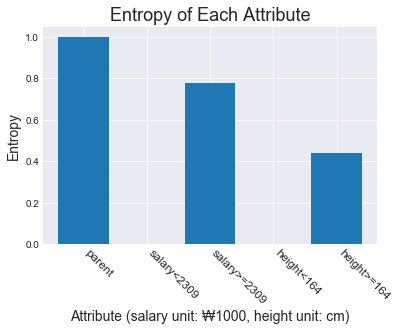

In [5]:
igs, entropies = get_information_gain(genders, attributes, data)
entropies_sorted  = sorted(entropies.items(), key=lambda x: x[1])
entropies_df = pd.DataFrame(entropies_sorted, columns=['Attribute', 'Entropy ( ↑ )'])
display(entropies_df)

plt.title('Entropy of Each Attribute', fontsize=18)
plt.ylabel('Entropy', fontsize=14)
plt.xlabel('Attribute (salary unit: ₩1000, height unit: cm)', fontsize=14)
plt.xticks(range(len(entropies)), entropies.keys(), rotation=-45, ha='left', fontsize=12)
plt.bar(range(len(entropies)), entropies.values(), align='center')
plt.show()

In [6]:
igs_sorted  = sorted(igs.items(), key=lambda x: x[1], reverse=True)
igs_df = pd.DataFrame(igs_sorted, columns=['Attribute', 'IG ( ↓ )'])
display(igs_df)

,Attribute,IG ( ↓ )
0,height,0.758277
1,salary,0.493423
